In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error

In [2]:
df= pd.read_excel("CoviddataML2.xlsx", usecols=['date'])
df1= pd.read_excel("CoviddataML2.xlsx", usecols=['avg.deaths'])

In [3]:
df.fillna(method= 'ffill', inplace= True)

C:\Users\lakec\AppData\Local\Temp\ipykernel_27900\2205892214.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method= 'ffill', inplace= True)


In [4]:
X= np.array(df).reshape(-1, 1)
y= np.array(df1).reshape(-1, 1)

In [5]:
print(X)
print(y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]
 [20]
 [21]
 [22]
 [23]
 [24]
 [25]
 [26]
 [27]
 [28]
 [29]
 [30]
 [31]]
[[2.9]
 [2.4]
 [2. ]
 [1.6]
 [1.6]
 [1.4]
 [1.4]
 [1.3]
 [1.6]
 [1.7]
 [1.7]
 [1.7]
 [2. ]
 [2.1]
 [2.1]
 [2. ]
 [1.7]
 [1.7]
 [1.9]
 [1.4]
 [1.3]
 [1.3]
 [0.9]
 [1. ]
 [0.9]
 [0.6]
 [0.7]
 [0.9]
 [0.9]
 [1.1]
 [1.3]]


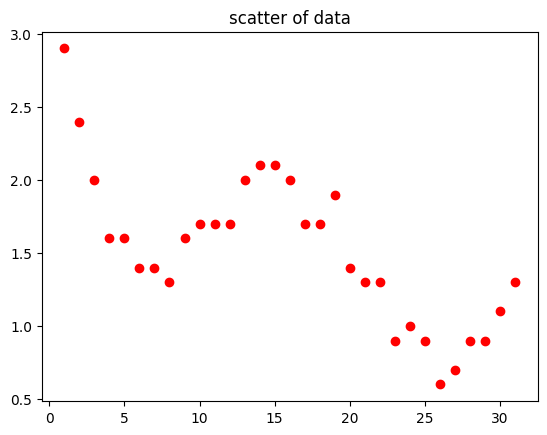

In [9]:
plt.title("scatter of data")
plt.scatter(X, y, color= 'r')
plt.show()

Equation of the data line: y=-0.041008064516129004x + 2.1754838709677413
Equation of the training line: y=-0.041831747517288x + 2.123698850933292


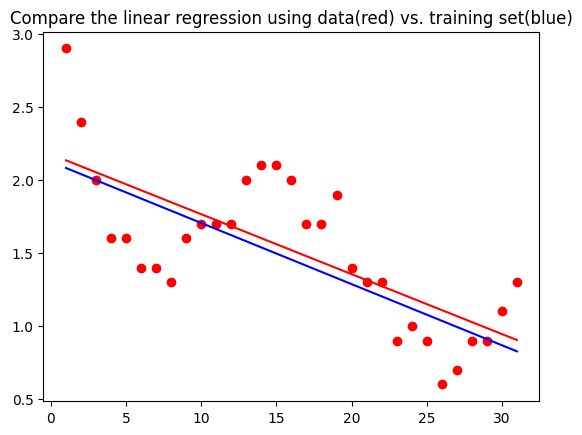

Model R Squared score: 0.2721123619404714


In [23]:
model= LinearRegression()
model.fit(X, y)
plt.scatter(X, y, color='r')
line= model.coef_[0][0]*X + model.intercept_[0]
plt.plot(X, line, color='r')
print(f'Equation of the data line: y={model.coef_[0][0]}x + {model.intercept_[0]}')
#Splitting data in training and test samples
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=.25)
#Perform regression on training set
model.fit(X_train, y_train)
line= model.coef_[0][0]*X + model.intercept_[0]
plt.plot(X, line, color= 'b')
print(f'Equation of the training line: y={model.coef_[0][0]}x + {model.intercept_[0]}')
plt.title(f'Compare the linear regression using data(red) vs. training set(blue)')
plt.show()
print("Model R Squared score: " + str(model.score(X_test, y_test))) 

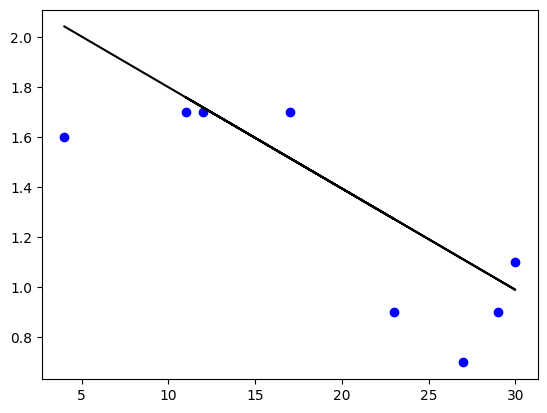

In [20]:
#Visualize test data scatter and regression
y_pred= model.predict(X_test)
plt.scatter(X_test, y_test, color='b')
plt.plot(X_test, y_pred, color='k')
plt.show()


In [22]:
#Evaluate Model Success on Test Set
mae= mean_absolute_error(y_true=y_test, y_pred=y_pred)
mse= mean_squared_error(y_true=y_test, y_pred=y_pred)
rmse= root_mean_squared_error(y_true=y_test, y_pred=y_pred)
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)

MAE: 0.21579508937537656
MSE: 0.07123580822694923
RMSE: 0.2669003713503397
